In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

- We'll look at some general characteristics of the plays that involve a punt return. The dataset presented is created by parsing the PlayDescription field and isolating punts that actually resulted in some return rather than plays with no chance of return (dead ball, fair catch, etc.). I've also stripped the dataset of particular plays such as punt returns for a touchdown since I play with that data in a separate notebook.

In [19]:
remainder_df = pd.read_csv('data/yardage_and_proximity.csv')
print(remainder_df.shape)
remainder_df.head()

(2589, 11)


,GameKey,PlayID,count,proximity,PlayDescription,Poss_Team,YardLine,punt distance,side ball lands,yardline received,yardage on play
0,3,455,22,7.120003,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT,BLT 32,54,CAR,14,9
1,3,1542,21,0.730001,(2:54) (Punt formation) S.Koch punts 45 yards ...,BLT,BLT 34,45,CAR,21,-1
2,4,927,22,4.889999,"(1:53) A.Lee punts 40 yards to GB 27, Center-C...",CLV,CLV 33,40,GB,27,1
3,4,1725,21,15.660004,"(2:48) A.Lee punts 66 yards to GB 15, Center-C...",CLV,CLV 19,66,GB,15,5
4,4,2888,22,12.639999,"(3:29) T.Masthay punts 43 yards to GB 44, Cent...",GB,GB 1,43,GB,44,24


In [20]:
# Check if punt team is always punting from their side of the field
count = 0
for i in range(len(remainder_df)):
    team_name_len = len(remainder_df.loc[i, 'Poss_Team'])
    if remainder_df.loc[i, 'Poss_Team'] == remainder_df.loc[i, 'YardLine'][:team_name_len]:
        continue
    else:
        count += 1
print("Number of plays where punt team is punting in opponents territory:", count, '->', count/remainder_df.shape[0])

Number of plays where punt team is punting in opponents territory: 46 -> 0.017767477790652762


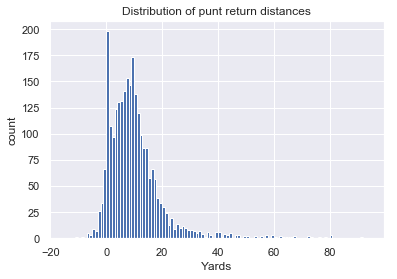

count    2589.000000
mean        9.570877
std        10.195922
min       -11.000000
25%         3.000000
50%         8.000000
75%        13.000000
max        91.000000
Name: yardage on play, dtype: float64


In [21]:
'''Plot of distribution of punt return distances'''
sns.set()
bins = [i for i in range(-15, 95, 1)]
plt.hist(remainder_df['yardage on play'], bins=bins)

plt.title('Distribution of punt return distances')
plt.xlabel('Yards')
plt.ylabel('count')
plt.show()

print(remainder_df['yardage on play'].describe())

- Punt returns really tapper off after 20 yards. Really should consider what is the 'value' of a return when considering implementing a particular rule.

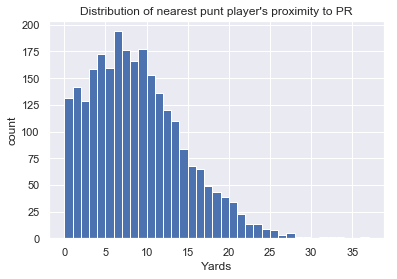

count    2589.000000
mean        8.897852
std         5.723655
min         0.000000
25%         4.529999
50%         8.190002
75%        12.300003
max        37.650002
Name: proximity, dtype: float64


In [23]:
from math import ceil

"""Plot of distribution of nearest punt player's proximity to PR"""
sns.set()
bins = [i for i in range(0, ceil(max(remainder_df['proximity'])), 1)]
plt.hist(remainder_df['proximity'], bins=bins)

plt.title("Distribution of nearest punt player's proximity to PR")
plt.xlabel('Yards')
plt.ylabel('count')
plt.show()

print(remainder_df['proximity'].describe())

- The distribution above describes the distances of the closest punt team player to the player on the return team who I assume is receiving the punt at the point at which they are catching the ball.
- Proximity can be important when considering the 'risk' of a play.